In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import colorsys
import argparse
import imutils
import random
import os
import sys

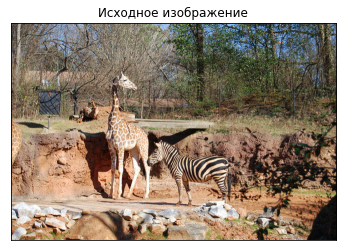

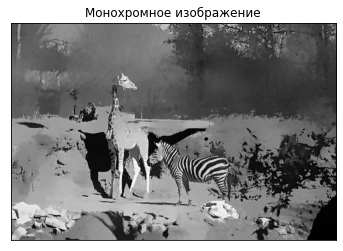

In [2]:
img = cv2.imread('Comp_Vision_Task_5_File_10.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.show()
shifted = cv2.pyrMeanShiftFiltering(img, 21, 51)
gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, 'gray')
plt.title('Монохромное изображение'), plt.xticks([]), plt.yticks([])
plt.show()

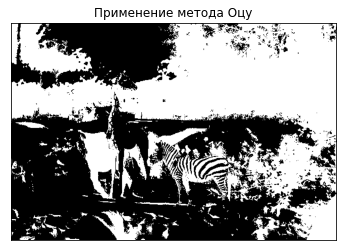

In [3]:
thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
plt.imshow(thresh, 'gray')
plt.title('Применение метода Оцу'), plt.xticks([]), plt.yticks([])
plt.show()

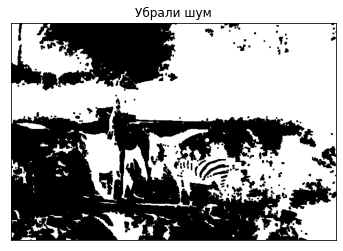

In [4]:
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, np.ones((2,2),np.uint8), iterations = 2)
plt.imshow(closing, 'gray')
plt.title('Убрали шум'), plt.xticks([]), plt.yticks([])
plt.show()

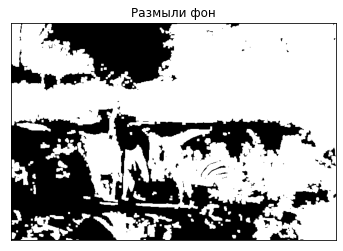

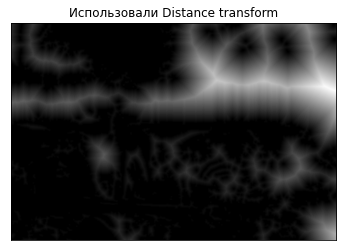

In [5]:
sure_bg = cv2.dilate(closing,np.ones((2,2),np.uint8),iterations=3)
plt.imshow(sure_bg, 'gray')
plt.title('Размыли фон'), plt.xticks([]), plt.yticks([])
plt.show()
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
plt.imshow(dist_transform, 'gray')
plt.title('Использовали Distance transform'), plt.xticks([]), plt.yticks([])
plt.show()

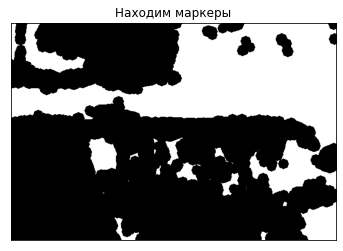

In [6]:
sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)[1]
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg, 'gray')
plt.title("Находим маркеры"), plt.xticks([]), plt.yticks([])
plt.show()

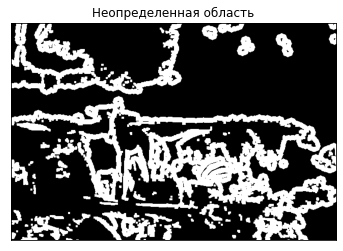

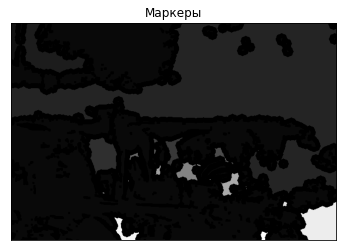

(428, 640)

In [7]:
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, 'gray')
plt.title("Неопределенная область"), plt.xticks([]), plt.yticks([])
plt.show()
markers = cv2.connectedComponents(sure_fg)[1]
markers = markers+1 # прибавляем 1, чтобы избежать 0 в областях, которые определены
markers[unknown==255] = 0
plt.imshow(markers, 'gray')
plt.title("Маркеры"), plt.xticks([]), plt.yticks([])
plt.show()
markers.shape

Доля переднего плана: 0.423
Доля заднего плана: 0.55
Доля границы: 0.027


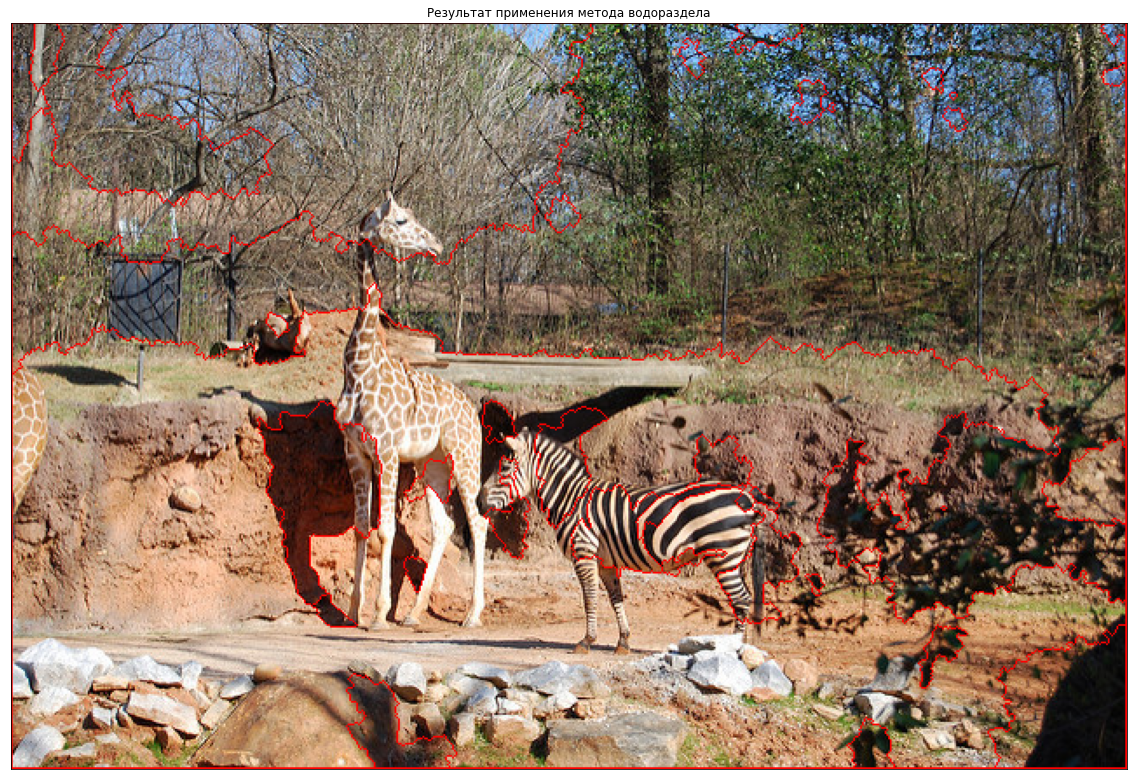

In [8]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
fig = plt.figure(figsize=(20,20))
border = 0
background = 0
front = 0
total = 0
for row in markers:
    for rowEl in row:
        if rowEl == 1:
            background += 1
        elif rowEl == -1:
            border += 1
        else:
            front += 1
        total += 1
print("Доля переднего плана: {}".format(round(front/total, 3)))
print("Доля заднего плана: {}".format(round(background/total, 3)))
print("Доля границы: {}".format(round(border/total, 3)))
plt.imshow(img)
plt.title("Результат применения метода водораздела"), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.3 MB 47 kB/s 
     |████████████████████████████████| 3.1 MB 44.8 MB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
     |████████████████████████████████| 488 kB 80.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you

In [10]:
import tensorflow

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [11]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 30.08 MiB/s, done.
Resolving deltas: 100% (565/565), done.


In [12]:
!pip3 install mrcnn
!pip install  -r Mask_RCNN/requirements.txt
!python Mask_RCNN/setup.py install
!pip install keras==2.3.0

     |████████████████████████████████| 51 kB 272 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54932 sha256=931915e20df5cf26f894816441fb42da45db35576de5d7e9e2d737570db7a08f
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn
     |████████████████████████████████| 296 kB 29.4 MB/s 
     |████████████████████████████████| 154 kB 68.3 MB/s 
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
error: package directory 'mrcnn' does not exist
     |████████████████████████████████| 377 kB 28.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.

In [13]:
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


In [19]:
class MaskRCNNConfig(Config):
    NAME = "coco_pretrained_model_config20220512T1437"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.8 # минимальный процент отображения прямоугольника
    NUM_CLASSES = 81

In [20]:
import mrcnn.utils
DATASET_FILE = "mask_rcnn_coco.h5"
if not os.path.exists(DATASET_FILE):
    mrcnn.utils.download_trained_weights(DATASET_FILE)

In [16]:
model = modellib.MaskRCNN(mode="inference", model_dir=os.getcwd(), config=MaskRCNNConfig())



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [21]:
model.load_weights(DATASET_FILE, by_name=True)

AttributeError: ignored

In [18]:
image = cv2.imread('/content/coffe.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=512)
plt.imshow(image)

AttributeError: ignored

In [ ]:
r = model.detect([image], verbose=1)[0]

Processing 1 images
image


AttributeError: ignored

In [ ]:
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush'] 

In [ ]:
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            CLASS_NAMES, r['scores'])

NameError: ignored

In [ ]:
index = 0
print('Prob: ', str(round(r['scores'][index], 3)))
print('Class: ', str(CLASS_NAMES[r['class_ids'][index]]))
mask = 0
total = 0
for row in r['masks']:
    for rowEl in row:
        if (rowEl[0] == True):
                mask += 1
        total += 1
print('Доля объекта: {}'.format(round(mask / total, 3)))
box = r['rois'][index]
print('X: {} Y: {} Width: {} Height: {}'.format(box[1], box[0], box[3] - box[1], box[2] - box[0]))

NameError: ignored